## Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you"ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- Isoa code: this represents a policing area
- borough: the london borough for which the statistic is related 
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic 
- month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you"re able to make decisions using data in a scientific manner. And the important things: Visualized the data. 

the questions is:

- What major categories of crimes occurred during the period from 2008 - 2016?"
- Average percentage of major categories that occur from 2008-2016
- What is the change in the number of major category crimes  in the last three years (2014, 2015, 2016)?
- Where the major category cime occur during 2008-2016?


## LONDON CRIME Dataset : Simple Exploratory Data Analysis (EDA)

#### Import Library
Untuk memulai pengerjaan kita akan mengimport semua library yang dibutuhkan.


In [2]:
# import library dan analisis data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import wordcloud
from wordcloud import WordCloud


#### Load Dataset 
Upload dataset yang telah di download dari kaggel dengan format csv


In [3]:
# import data --> london crime
crime_df = pd.read_csv("dataset\london_crime_by_lsoa.csv") # memuat file csv sebagai data frame
crime_df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
crime_df.head () #tampilkan 5 baris pertama

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


#### Identify the shape of the dataset

In [5]:
crime_df.shape # bentuk dimensi dataset yang menerangkan jumlah 13490604 data dan 6 kategori + 1 kolom id

(13490604, 7)

#### Identify data type each column

In [6]:
crime_df.dtypes # type data tiap kolom

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

In [7]:
crime_df.info() # memberikan ringkasan tentang dataset, termasuk jumlah data, tipe data kolom, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Identify missing value

In [8]:
crime_df.isna().values.any() # mendeteksi keberadaan nilai kosong

False

#### Describe the dataset

In [9]:
crime_df.describe () # untuk menghasilkan ringkasan statistik

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## LONDON CRIME Dataset : Data Visualisation

### BarChart
#### What major categories of crimes occurred during the period from 2008 - 2016?

In [10]:
# Mengubah kolom "year" ke tipe data numerik 
crime_df["year"] = pd.to_numeric(crime_df["year"])

# Filter data untuk tahun 2008 dan hitung jumlahnya dan mengelompokan berdasarkan major category
major_category_2008 = crime_df[crime_df["year"] == 2008].groupby("major_category")["value"].sum().reset_index()

major_category_2008

,major_category,value
0,Burglary,88092
1,Criminal Damage,91872
2,Drugs,68804
3,Fraud or Forgery,5325
4,Other Notifiable Offences,10112
5,Robbery,29627
6,Sexual Offences,1273
7,Theft and Handling,283692
8,Violence Against the Person,159844


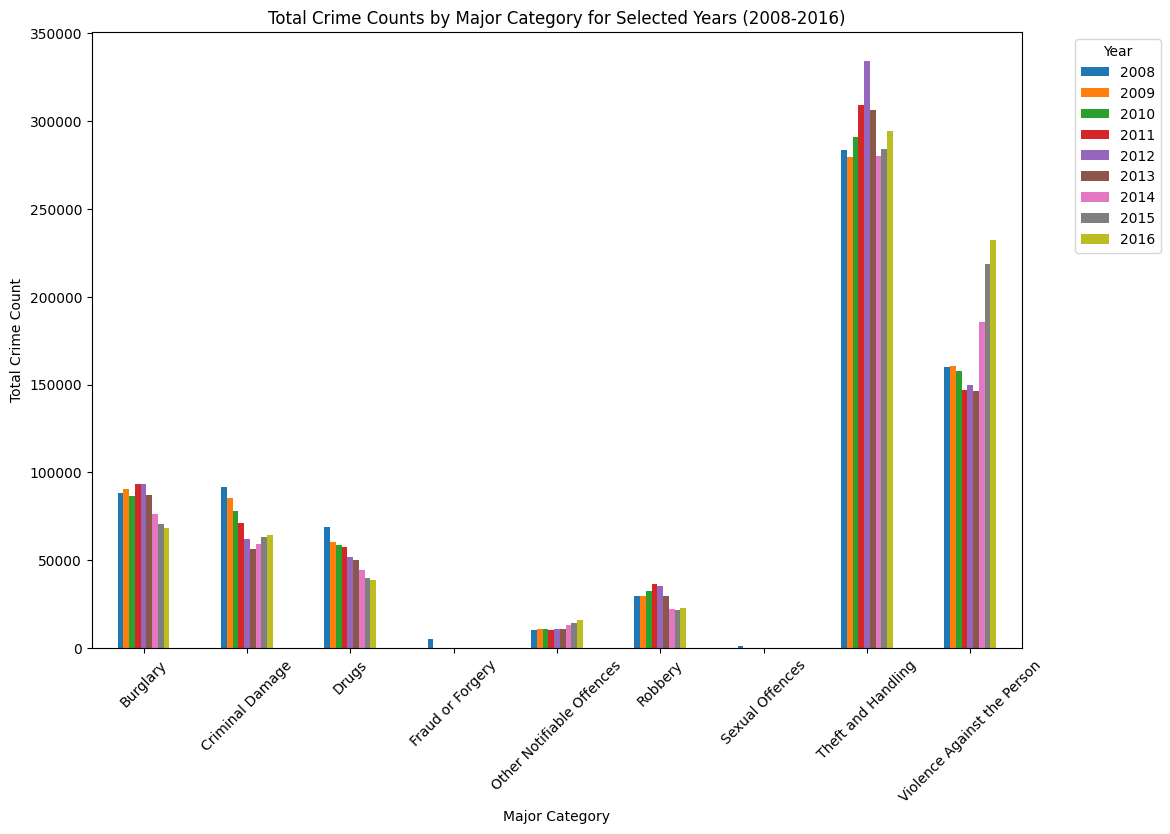

In [11]:
# Filter data untuk setiap tahun yang diinginkan
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

# Inisialisasi sebuah DataFrame baru untuk menyimpan hasil pengelompokan berdasarkan tahun
result_df = pd.DataFrame()

# Loop melalui setiap tahun dan menghitung total kejahatan dalam setiap kategori 
for year in years:
    year_data = crime_df[crime_df["year"] == year].groupby("major_category")["value"].sum().reset_index()
    year_data.rename(columns={"value": str(year)}, inplace=True)  # Ubah nama kolom value sesuai tahun
    if result_df.empty:
        result_df = year_data
    else:
        result_df = pd.merge(result_df, year_data, on="major_category", how="outer")

# Plotting chart
result_df.set_index("major_category").plot(kind="bar", figsize=(12, 8))
plt.xlabel("Major Category")
plt.ylabel("Total Crime Count")
plt.title("Total Crime Counts by Major Category for Selected Years (2008-2016)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

sum: Dari menginput data major kategory dengan total crime per tahun, diketahui bahwa sepanjang tahun 2008 - 2016 kejahatan paling sering terjadi pada tahun 2012.  Kita lihat, semua kategory berjumlah lebih dari 275000 pertahun 2012.  Untuk major categori yang terjadi didominasi oleh theft and handling sepanjang tahun, lalu disusul oleh Violence Against the Person dan 2 kasus yang jarang terjadi yaitu Sexual Offences dan Fraud or Forgery ( hanya terlihat terjadi pada tahun 2008 sekitar 5000 an kasus). 

### Pie Chart

####  Average percentage of major categories that occur from 2008-2016


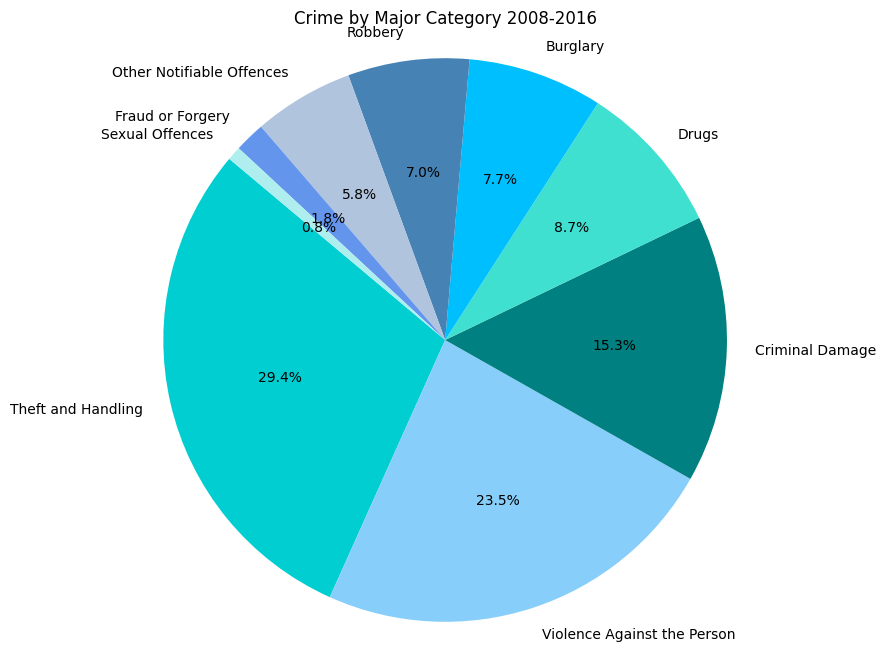

In [12]:
# filter data nilai berdasarkan major category
major_categori_crime = crime_df["major_category"].value_counts()

# Plotting chart
colors = ["darkturquoise","lightskyblue","teal","turquoise", "deepskyblue","steelblue","lightsteelblue","cornflowerblue","paleturquoise"]
plt.figure(figsize=(8, 8))
plt.pie(major_categori_crime, labels=major_categori_crime.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Crime by Major Category 2008-2016")
plt.axis("equal")  
plt.show()

SUM: berdasarkan informasi yang didapatkan dari bar chart dimana theft and handling merupakan casus tertinggi yang terjadi pada major category. untuk melihat seberapa mendominasi c
kasus tersebut dapat kita lihat dengan persentase yang ditampilakn oleh pie chart diatas, untuk theft and handling yang peringkat 1 mendominasi 29.4 % dari total kasus yang terjadi sepanjang 2008-20016. untuk 2 kategori tertinggi yaitu theft and handling dan violence against the person sudah mendominasi lebih dari 50 % yang menandakan london darurat akan kasus kriminal tersebut.

### Histogram Plot

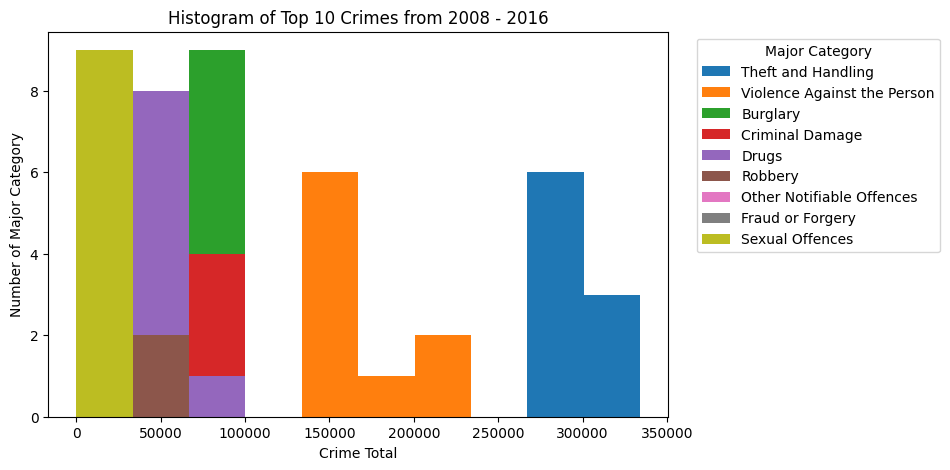

In [13]:
# Filter data untuk tahun 2008-2016
filter_date = crime_df[(crime_df["year"] >= 2008) & (crime_df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan
crime_total = filter_date.groupby("major_category")["value"].sum().reset_index()
top_10 = crime_total.sort_values(by="value", ascending=False).head(10)
pivot = filter_date.pivot_table(index="year", columns="major_category", values="value", aggfunc="sum")

# Filter hanya untuk 10 jenis kejahatan teratas
top_pivot = pivot[top_10["major_category"]]

# Plot histogram untuk top 10 jenis kejahatan dari tahun 2008 hingga 2016
top_pivot.plot(kind="hist", figsize =(8, 5))
plt.xlabel("Crime Total")
plt.ylabel("Number of Major Category")
plt.title("Histogram of Top 10 Crimes from 2008 - 2016")
plt.legend(title="Major Category", bbox_to_anchor=(1.45, 1), loc="upper right")
plt.show()

SUM: Dari plotingan major category dan total crime yang dihasilkan didapatkan bahwa criminalitas diluar top 2 case semuanya berada di bawah angka 100000 kasus selama 2008 - 2016.

### Box Plot

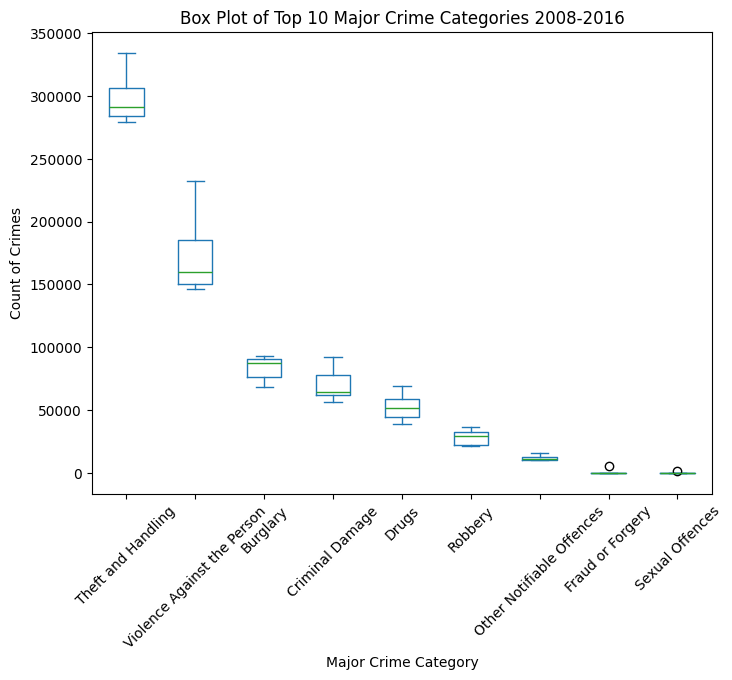

In [14]:
filter_df = crime_df[(crime_df["year"] >= 2008) & (crime_df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
crime_total = filter_df.groupby("major_category")["value"].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_10_crimes = crime_total.sort_values(by="value", ascending=False).head(10)
pivot_table = filter_df.pivot_table(index="year", columns="major_category", values="value", aggfunc="sum")
top_10_pivot = pivot_table[top_10_crimes["major_category"]] 

top_10_pivot.describe()

# plotting
top_10_pivot.plot(kind="box", figsize=(8, 6))
plt.title("Box Plot of Top 10 Major Crime Categories 2008-2016")
plt.xlabel("Major Crime Category")
plt.ylabel("Count of Crimes")
plt.xticks(rotation=45)
plt.show()


SUM: Dengan memanfaatkan data nilai statistika berupa persentil, mean, modul dll didapatkan nilai ploting menggunakan box plot dengan menggunakan (.describe). dari hal tersebut didapatkan 10 kategori kejahatan yang ada pada major category.

### Scatter Plot
#### What is the change in the number of major category crimes  in the last three years (2014, 2015, 2016)?

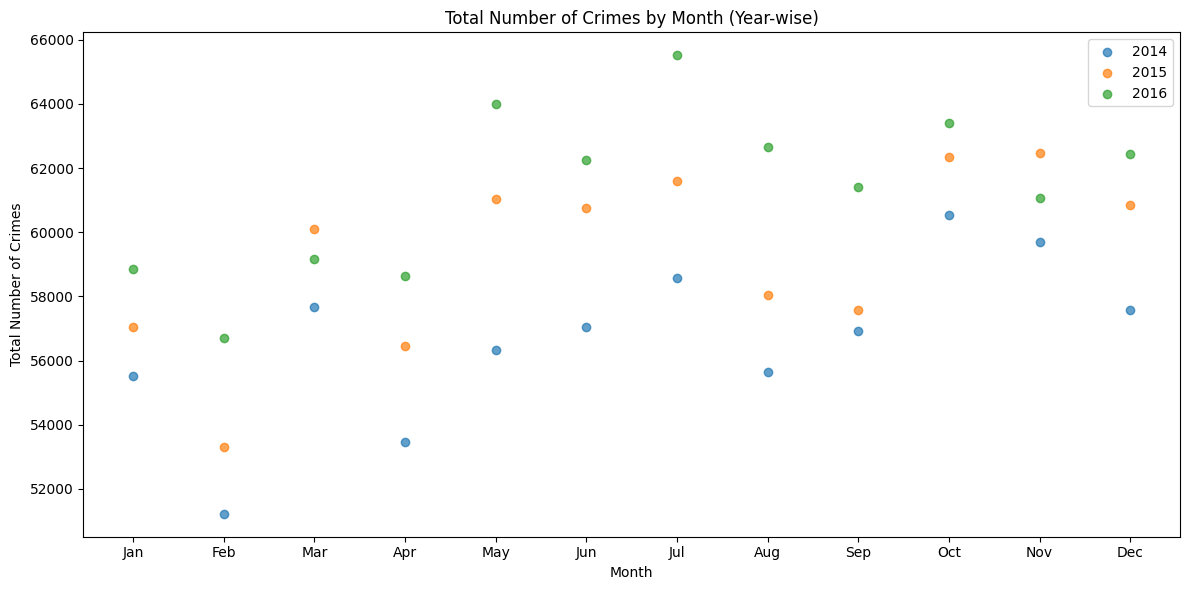

In [15]:
# Filter data untuk setiap tahun yang diinginkan
selected_years = [2014, 2015, 2016]
filtered_data = crime_df[crime_df["year"].isin(selected_years)]

# Membuat DataFrame baru yang berisi total kejahatan per bulan per tahun
total_crimes_by_month_year = filtered_data.groupby(["year", "month"])["value"].sum().reset_index()

# Membuat scatter plot
plt.figure(figsize=(12, 6))
for year in total_crimes_by_month_year["year"].unique():
    year_data = total_crimes_by_month_year[total_crimes_by_month_year["year"] == year]
    plt.scatter(year_data["month"], year_data["value"], label=str(year), alpha=0.7)

# plotting 
plt.xlabel("Month")
plt.ylabel("Total Number of Crimes")
plt.title("Total Number of Crimes by Month (Year-wise)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.tight_layout()
plt.show()

SUM: berdasarkan plotingan data kasus 3 tahun terakhir didapati sebuah kesimpulan bahwa setiap kasus hampir meningkat dari tahun ke tahun dan perbandingan 3 tahun belakang total nomber of crimes meningkat terhadap bulan tiap tahunnya mulai dari januari samapi desember dan kecuali bulan maret dan november dimana total kasus 2015 lebih tinggi dibandingkan total kasus 2016. pada akhir tahun 2014 dan 2015 kasus cenderung turun, sedangkan pada akhir tahun 2016 cenderung turun naik.

### Area Plot
#### Where the major category cime occur during 2008-2016?

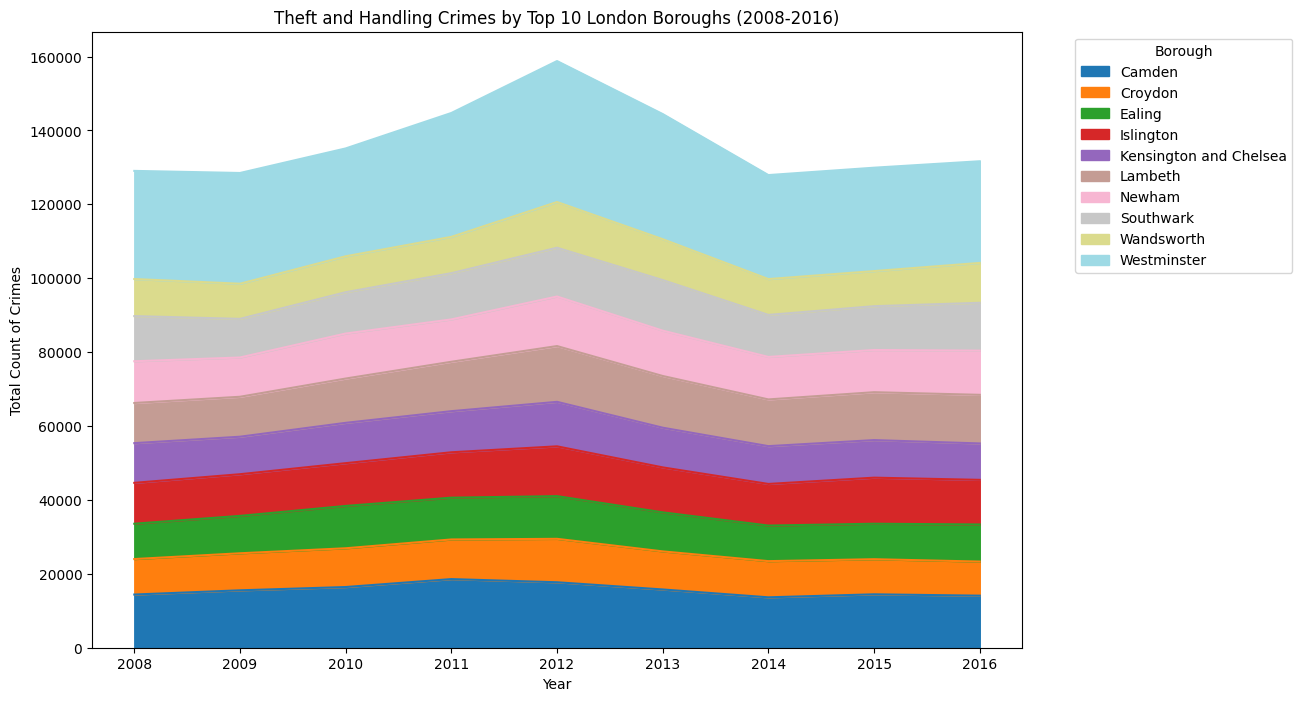

In [16]:
# Filter data hanya mencakup (theft and handling)
theft_handling_df = crime_df[crime_df["major_category"] == "Theft and Handling"]

# gabungkan data  brought , year dan total count of crimes
crime_by_borough_year = theft_handling_df.groupby(["borough", "year"])["value"].sum().reset_index()

# temukan top 10 brough 
top_10_boroughs = crime_by_borough_year.groupby("borough")["value"].sum().nlargest(10).index

# Filter data untuk hanya mencakup 10 wilayah teratas
crime_by_borough_year_top_10 = crime_by_borough_year[crime_by_borough_year["borough"].isin(top_10_boroughs)]

# Pivot data tersebut sehingga wilayah menjadi kolom dan tahun menjadi baris
pivot_table = crime_by_borough_year_top_10.pivot(index="year", columns="borough", values="value")
ax = pivot_table.plot(kind="area", figsize=(12, 8), colormap="tab20")

# plotting
plt.title("Theft and Handling Crimes by Top 10 London Boroughs (2008-2016)")
plt.xlabel("Year")
plt.ylabel("Total Count of Crimes")
plt.legend(title="Borough", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


SUM: Berdasarkan pembacaan data sebelumnya bahwa Theft an Handling merupakan kasus paling tinggi yang terjadi di london selama 2008 - 2016. b=sehingga untuk melihat persebaran daerah tempat terjadinya kasus tersebut dapat menggunakan area plot sehingga didapatkan bahwa westminter merupakan daerah dengan kejahatan major tertinggi sekitar 160000 kasus disusul dengan wandsworth dan diposisi 10 ada candem.

### WordClouds
#### "What are the top 3 major categories that occurred during 2008-2016?"

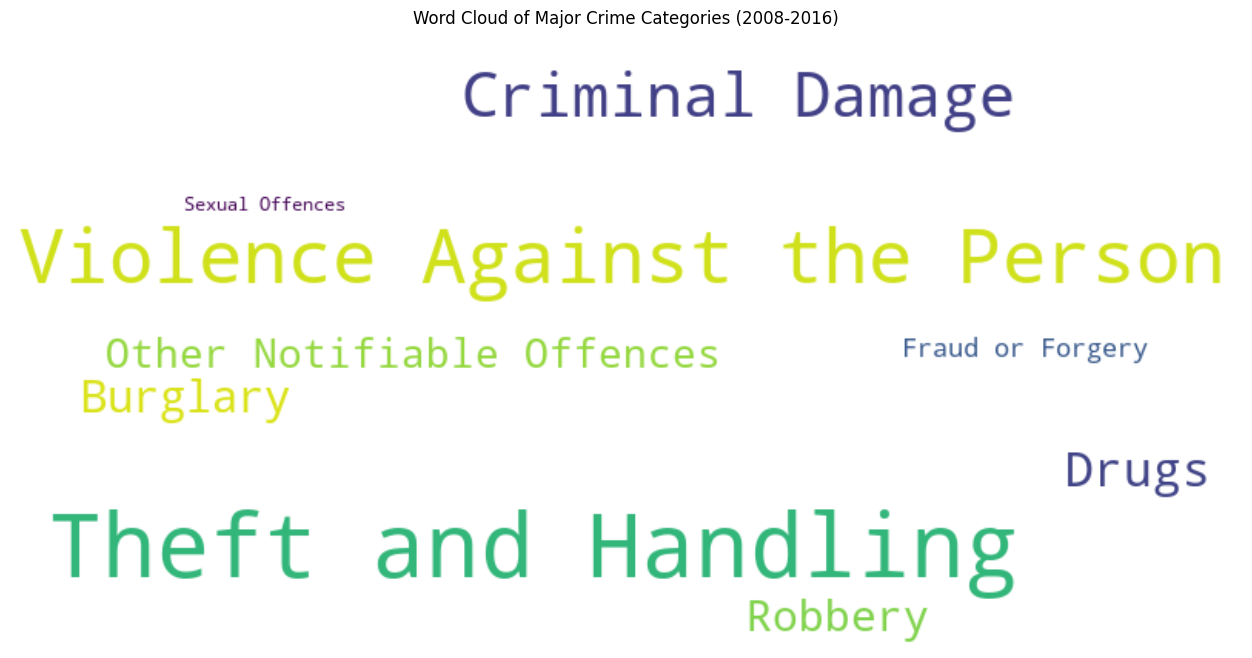

In [17]:
# filter data untuk tahun yang diinginkan
crime_df = crime_df[(crime_df["year"] >= 2008) & (crime_df["year"] <= 2016)]

# Filter data untuk  major category 
major_category_counts = crime_df["major_category"].value_counts()

# buat wordcloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(major_category_counts)

# plotting
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Major Crime Categories (2008-2016)")
plt.show()

SUM: berdasarkan ngeplot data value major kategy didapatkan ukuran tulisan thief and handling dan violence against the person sangat besar hal ini menandakan emakin besar kata-kata dalam Word Cloud tersebut, semakin sering jenis kejahatan tersebut terjadi selama 2008-2016.

In [18]:
# Coordinates for London
lat = 51.5074
lon = -0.1278

# masukin lokasi center london di map
london_map = folium.Map(location=[lat, lon], zoom_start=10)

# jika ada loksi semua daerah masukin juga
boroughs = [
    {"name": "Croydon", "lat": 51.36782, "lon": -0.1172587},
    {"name": "Greenwich", "lat": 51.46759, "lon": 0.0138567},
    {"name": "Bromley", "lat": 51.36682, "lon": -0.0294160},
    {"name": "Redbridge", "lat": 51.58629, "lon": 0.0440625},
    {"name": "Wandsworth", "lat": 51.45146, "lon": -0.2277559},
]

for borough in boroughs:
    folium.Marker(
        location=[borough["lat"], borough["lon"]],
        popup=borough["name"],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(london_map)

# Display map
london_map

SUM: Berdasarkan coordinat yang ditemukan di internet , lokasi yang memiliki latitude dan longitude dapat di plot kedalam map yang ada, berikaut 5 location from borough in london.

## CONCLUTION
- Pada tahun 2012 merupakan tahun tertinggi tingkat kriminalitas terjadi selama 2008 - 2016.
- Westminster berada di peringkat teratas dengan tingkat kejahatan tertinggi selama 2008 - 2016.
- theft and handling dan  Violence Against the Person  merupakan most popoular crime yang terjadi di london selama 2008 - 2016.
- Sexual Offences dan Fraud or Forgery merupakan 2 kasus yang paling jarang terjadi di london selama 2008 - 2016.



